<a href="https://colab.research.google.com/github/segnig/Tanzania-Tourism-Prediction/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
FILE_PATH = "/content/drive/MyDrive/Data Science/Tanzania Tourism Prediction/"

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
train_df = pd.read_csv(FILE_PATH + "merged_df_tanzania.csv")
test_df = pd.read_csv(FILE_PATH + "Test.csv")

In [6]:
train_df.head()

,age_group,travel_with,purpose,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,first_trip_tz,total_cost,Number_of_Packages,country_category,total_people,total_day
0,45-64,Friends/Relatives,3,Independent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,674602.5,1,Category A,2.0,13.0
1,25-44,Alone,3,Independent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,3214906.5,1,Category A,1.0,21.0
2,25-44,Alone,2,Independent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,3315000.0,1,Category A,1.0,32.0
3,25-44,Spouse,3,Package Tour,0.0,2.0,2.0,2.0,2.0,2.0,0.0,Yes,7790250.0,6,Category A,2.0,11.0
4,45-64,Friends/Relatives,3,Package Tour,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Yes,3480750.0,8,Category A,2.0,13.0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3846 entries, 0 to 3845
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              3846 non-null   object 
 1   travel_with            3846 non-null   object 
 2   purpose                3846 non-null   int64  
 3   tour_arrangement       3846 non-null   object 
 4   package_transport_int  3846 non-null   float64
 5   package_accomodation   3846 non-null   float64
 6   package_food           3846 non-null   float64
 7   package_transport_tz   3846 non-null   float64
 8   package_sightseeing    3846 non-null   float64
 9   package_guided_tour    3846 non-null   float64
 10  package_insurance      3846 non-null   float64
 11  first_trip_tz          3846 non-null   object 
 12  total_cost             3846 non-null   float64
 13  Number_of_Packages     3846 non-null   int64  
 14  country_category       3846 non-null   object 
 15  tota

In [8]:
drop_col = ["Number_of_Packages"]

# corelations of the features

In [15]:
cor_matrix = train_df.drop("total_cost", axis=1).select_dtypes("number").corr()
cor_matrix

,purpose,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,Number_of_Packages,total_people,total_day
purpose,1.000000,0.354036,0.464816,0.445602,0.428829,0.378910,0.382880,0.255307,0.600870,0.206449,0.167929
package_transport_int,0.354036,1.000000,0.789074,0.691914,0.714369,0.550531,0.535808,0.506140,0.574571,0.392664,0.017539
package_accomodation,0.464816,0.789074,1.000000,0.905191,0.867176,0.745616,0.757209,0.466606,0.696363,0.460609,0.030412
package_food,0.445602,0.691914,0.905191,1.000000,0.818100,0.697827,0.719339,0.452997,0.686944,0.416502,0.018339
package_transport_tz,0.428829,0.714369,0.867176,0.818100,1.000000,0.728921,0.718794,0.473242,0.684688,0.407434,0.028015
package_sightseeing,0.378910,0.550531,0.745616,0.697827,0.728921,1.000000,0.783063,0.420777,0.641810,0.346274,0.046570
package_guided_tour,0.382880,0.535808,0.757209,0.719339,0.718794,0.783063,1.000000,0.459605,0.651563,0.352386,0.026211
package_insurance,0.255307,0.506140,0.466606,0.452997,0.473242,0.420777,0.459605,1.000000,0.506027,0.211346,-0.000454
Number_of_Packages,0.600870,0.574571,0.696363,0.686944,0.684688,0.641810,0.651563,0.506027,1.000000,0.156100,0.015688
total_people,0.206449,0.392664,0.460609,0.416502,0.407434,0.346274,0.352386,0.211346,0.156100,1.000000,0.056997


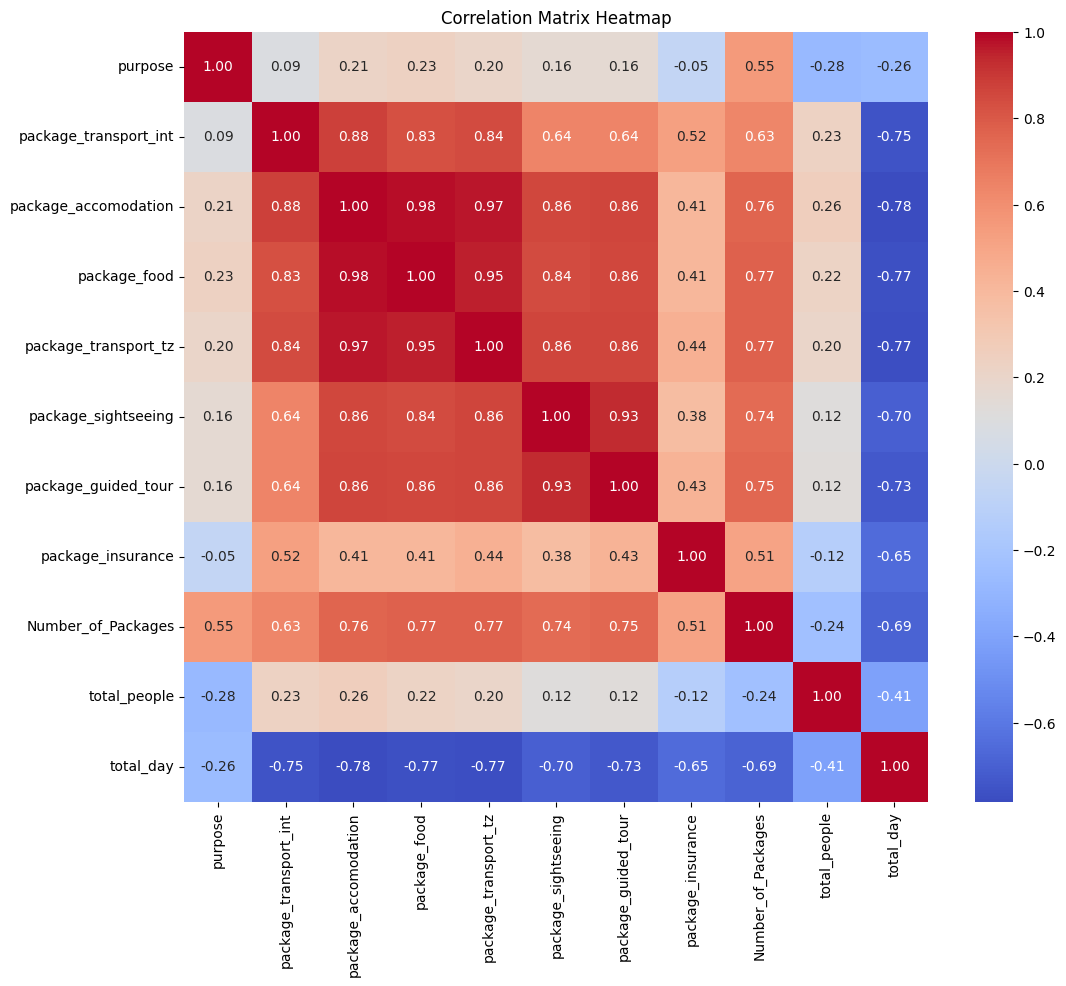

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
